In [58]:
# Step 11: Cavity Flow with Navier-Stockes

In [59]:
"""
    Solving Navier-Stokes in 2D, but with different BCs
    
    The momentum equation in vector form for velocity field vec(v):
        \partial vec(v) / \partial t + ( vec(v) . Nabla ) vec(v) 
            = - 1/ \ro Nabla p + \nu Nabla^2 vec(v)
            
    vec(v) = (u, v, w); 3D
"""

'\n    Solving Navier-Stokes in 2D, but with different BCs\n    \n    The momentum equation in vector form for velocity field vec(v):\n        \\partial vec(v) / \\partial t + ( vec(v) . Nabla ) vec(v) \n            = - 1/ \ro Nabla p + \nu Nabla^2 vec(v)\n            \n    vec(v) = (u, v, w); 3D\n'

In [60]:
"""
    System of differential equations: 
        + 2 equations for the velocity components u, v
        + 1 equation for pressure
        
        \partial u / \partial t + u \partial u / \partial x + v \partial u / \partial y 
            = - 1 / \ro \partial p / \partial x + \nu (\partial^2 u / \partial x^2 + \partial^2 u / \partial y^2)
        \partial v / \partial t + u \partial v / \partial x + v \partial v / \partial y 
            = - 1 / \ro \partial p / \partial y + \nu (\partial^2 v / \partial x^2 + \partial^2 v / \partial y^2)
        \partial^2 p / \partial x^2 + \partial^2 p / \partial y^2 
            = - \ro (\partial u / \partial x * \partial u / \partial x 
                        + 2 \partial u / \partial y * \partial v / \partial x  
                        + \partial v / \partial y * \partial v / \partial y )
"""

'\n    System of differential equations: \n        + 2 equations for the velocity components u, v\n        + 1 equation for pressure\n        \n        \\partial u / \\partial t + u \\partial u / \\partial x + v \\partial u / \\partial y \n            = - 1 / \ro \\partial p / \\partial x + \nu (\\partial^2 u / \\partial x^2 + \\partial^2 u / \\partial y^2)\n        \\partial v / \\partial t + u \\partial v / \\partial x + v \\partial v / \\partial y \n            = - 1 / \ro \\partial p / \\partial y + \nu (\\partial^2 v / \\partial x^2 + \\partial^2 v / \\partial y^2)\n        \\partial^2 p / \\partial x^2 + \\partial^2 p / \\partial y^2 \n            = - \ro (\\partial u / \\partial x * \\partial u / \\partial x \n                        + 2 \\partial u / \\partial y * \\partial v / \\partial x  \n                        + \\partial v / \\partial y * \\partial v / \\partial y )\n'

In [61]:
"""
    Dicretized equations:
        (u[i, j] - un[i, j]) / dt + un[i, j] * ( un[i, j] - un[i-1, j] ) / dx 
                                    + vn[i, j] * ( un[i, j] - un[i, j-1] ) / dy
                = - 1/ \ro ( p[i+1, j] - p[i-1, j]) / (2 * dx)
                    + \nu ( (un[i+1, j] - 2 * un[i, j] + un[i-1, j] ) / dx^2
                            (un[i, j+1] - 2 * un[i, j] + un[i, j-1] ) / dy^2 
                            ) 
        (v[i, j] - vn[i, j]) / dt + un[i, j] * ( vn[i, j] - vn[i-1, j] ) / dx 
                                    + vn[i, j] * ( vn[i, j] - vn[i, j-1] ) / dy
                = - 1/ \ro ( p[i+1, j] - p[i-1, j]) / (2 * dy)
                    + \nu ( (vn[i+1, j] - 2 * vn[i, j] + vn[i-1, j] ) / dx^2
                            (vn[i, j+1] - 2 * vn[i, j] + vn[i, j-1] ) / dy^2 
                            ) 
        ( p[i+1, j] - 2 * p[i, j] + p[i-1, j]) / dx^2
                    + ( p[i, j+1] - 2 * p[i, j] + p[i, j-1]) / dy^2
            = \ro ( 1 / dt * ( ( u[i+1, j] - u[i-1, j]) / (2 * dx) )
                                + ( v[i, j+1] - v[i, j-1]) / (2 * dy) )
                    - ( u[i+1, j] - u[i-1, j] ) / (2 * dx) * ( u[i+1, j] - u[i-1, j] ) / (2 * dx)            
                    - 2 * ( u[i, j+1] - u[i, j-1] ) / (2 * dy) * ( v[i+1, j] - v[i-1, j] ) / (2 * dy)            
                    - ( v[i, j+1] - v[i, j-1] ) / (2 * dy) * ( v[i, j+1] - v[i, j-1] ) / (2 * dy)            
                    )
    
"""

'\n    Dicretized equations:\n        (u[i, j] - un[i, j]) / dt + un[i, j] * ( un[i, j] - un[i-1, j] ) / dx \n                                    + vn[i, j] * ( un[i, j] - un[i, j-1] ) / dy\n                = - 1/ \ro ( p[i+1, j] - p[i-1, j]) / (2 * dx)\n                    + \nu ( (un[i+1, j] - 2 * un[i, j] + un[i-1, j] ) / dx^2\n                            (un[i, j+1] - 2 * un[i, j] + un[i, j-1] ) / dy^2 \n                            ) \n        (v[i, j] - vn[i, j]) / dt + un[i, j] * ( vn[i, j] - vn[i-1, j] ) / dx \n                                    + vn[i, j] * ( vn[i, j] - vn[i, j-1] ) / dy\n                = - 1/ \ro ( p[i+1, j] - p[i-1, j]) / (2 * dy)\n                    + \nu ( (vn[i+1, j] - 2 * vn[i, j] + vn[i-1, j] ) / dx^2\n                            (vn[i, j+1] - 2 * vn[i, j] + vn[i, j-1] ) / dy^2 \n                            ) \n        ( p[i+1, j] - 2 * p[i, j] + p[i-1, j]) / dx^2\n                    + ( p[i, j+1] - 2 * p[i, j] + p[i, j-1]) / dy^2\n            = \ro 

In [62]:
"""
    Initial conditions:
        u, v, p = 0
    Boundary conditions:
        u = 1 at y = 2 (the "lid"):
        u, v = 0 on the other boundaries
        \partial p / \partial y = 0 at y = 0
        p = 0 at y = 2
        \partial p / \partial x = 0 at x = 0, 2
"""

'\n    Initial conditions:\n        u, v, p = 0\n    Boundary conditions:\n        u = 1 at y = 2 (the "lid"):\n        u, v = 0 on the other boundaries\n        \\partial p / \\partial y = 0 at y = 0\n        p = 0 at y = 2\n        \\partial p / \\partial x = 0 at x = 0, 2\n'

In [63]:
import numpy
from matplotlib import  pyplot, cm
from mpl_toolkits.mplot3d import  Axes3D
%matplotlib inline

In [64]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))

In [65]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    b[1:-1, 1:-1] = ( rho * (1 / dt *
                             ( ( u[1:-1, 2:] - u[1:-1, 0:-2] ) / ( 2 * dx )
                            + ( v[2:, 1:-1] - v[0:-2, 1:-1] ) / ( 2 * dy ) 
                             )
                            - ( ( u[1:-1, 2] - u[1:-1, 0:-2] ) / ( 2 * dx ) 
                               )**2 
                            - 2 * ( ( u[2:, 1:-1] - u[0:-2, 1:-1] ) / ( 2 * dy ) 
                                    * ( v[1:-1, 2:] - v[1:-1, 0:-2] ) / ( 2 * dx ) 
                                   )
                            - ( ( v[2:, 1:-1] - v[0:-2, 1:-1] ) / ( 2 * dy ) 
                               )**2
                            )
                     )
    return b

In [66]:
def pressure_poisson(p, dx, dy, b):
    pn = numpy.empty_like(p)
    pn = p.copy()
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = ( ( ( pn[1:-1, 2:] + pn[1:-1, 0:-2] ) * dy**2
                           + ( pn[2:, 1:-1] + pn[0:-2, 1:-1] ) * dx**2 
                           ) / ( 2 * ( dx**2 + dy**2) )
                         - dx**2 * dy**2 / ( 2 * ( dx**2 + dy**2 ) ) * b[1:-1,1:-1] 
                         )
        p[:, -1] = p[:, -2]     # dp/dx = 0 at x = 2
        p[0,:] = p[1, :]        # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]       # dp/dx = 0 at x = 0
        p[-1, :] = 0            # p = 0 at y = 2
    return p

In [67]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1: -1, 1: -1] = (un[1:-1, 1:-1] -
                           un[1:-1, 1:-1] * dt / dx *
                           ( un[1:-1 , 1:-1] - un[1:-1, 0:-2] ) 
                           -
                           vn[1:-1, 1:-1] * dt / dy *
                           ( un[1:-1 , 1:-1] - un[0:-2, 1:-1] ) 
                           -
                           dt / ( 2 * rho * dx ) * ( p[1:-1, 2:] - p[1:-1, 0:-2])
                           +
                           nu * (dt / dx**2 
                                    * 
                                    ( un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2] ) 
                                 + 
                                 dt / dy**2 
                                    * 
                                    ( un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1] ) 
                                 )
                           )
        v[1: -1, 1: -1] = (vn[1:-1, 1:-1] -
                           un[1:-1, 1:-1] * dt / dx *
                           ( vn[1:-1 , 1:-1] - vn[1:-1, 0:-2] ) 
                           -
                           vn[1:-1, 1:-1] * dt / dy *
                           ( vn[1:-1 , 1:-1] - vn[0:-2, 1:-1] ) 
                           -
                           dt / ( 2 * rho * dx ) * ( p[2:, 1:-1] - p[0:-2, 1:-1])
                           +
                           nu * (dt / dx**2 
                                    * 
                                    ( vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2] ) 
                                 + 
                                 dt / dy**2 
                                    * 
                                    ( vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1] ) 
                                 )
                           )
        
        u[0, :]     = 0
        u[:, 0]     = 0
        u[:, -1]    = 0
        u[-1, :]    = 1 # Set velocity on cavity lid equal to 1
        v[0, :]     = 0
        v[-1, :]    = 0
        v[:, 0]     = 0
        v[:, -1]    = 0
    
    return u, v, p

In [68]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 100
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

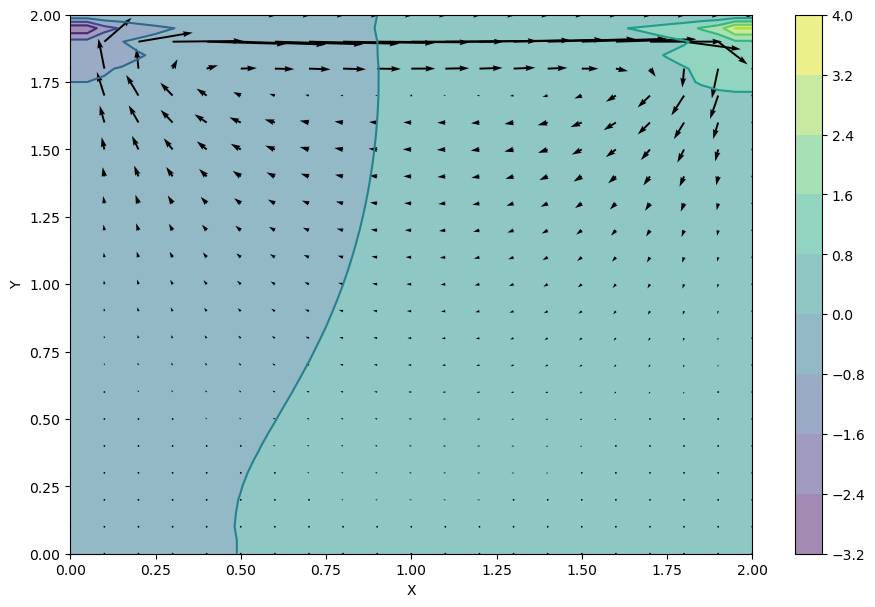

In [69]:
fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, p, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

In [70]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 700
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

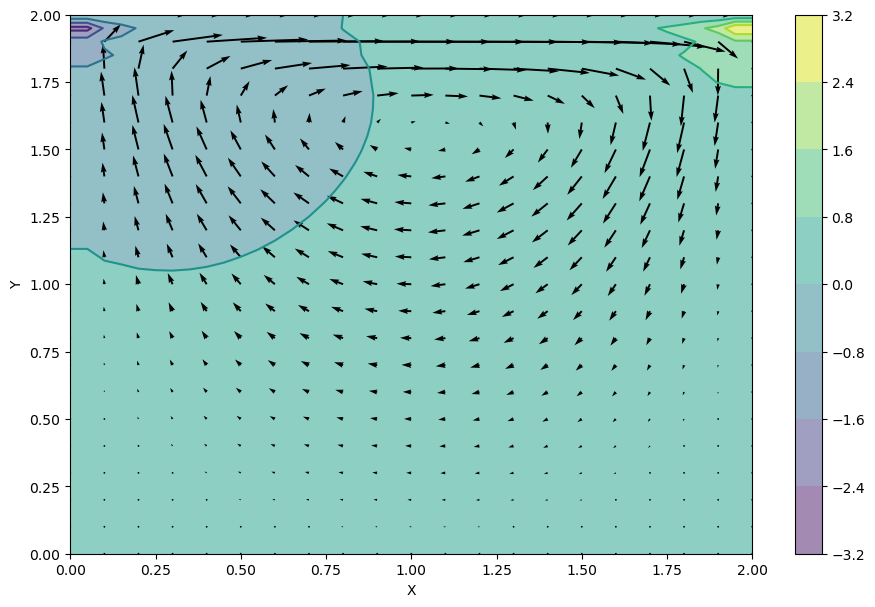

In [71]:
fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, p, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

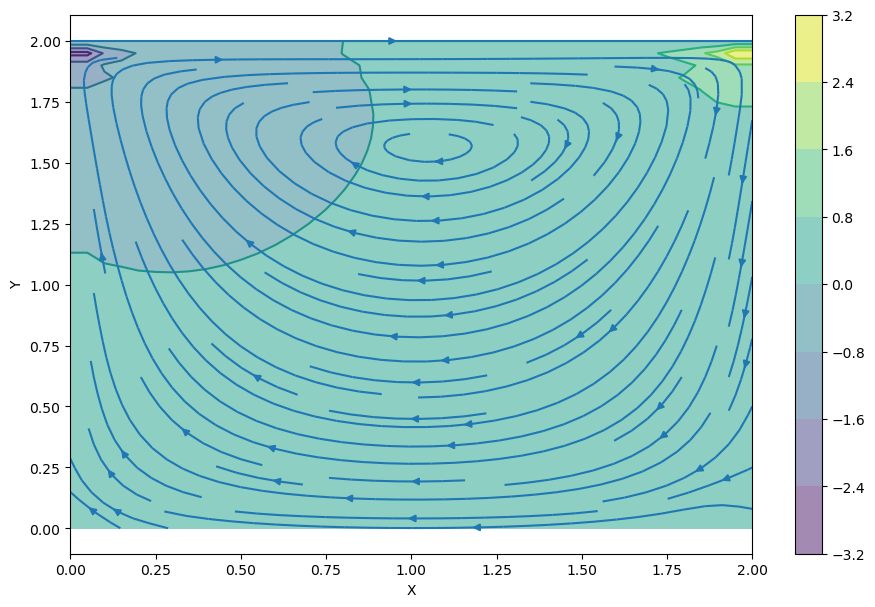

In [72]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p, cmap=cm.viridis)
pyplot.streamplot(X, Y, u, v)
pyplot.xlabel('X')
pyplot.ylabel('Y');

In [75]:
print("X = ", X)


X =  [[0.   0.05 0.1  ... 1.9  1.95 2.  ]
 [0.   0.05 0.1  ... 1.9  1.95 2.  ]
 [0.   0.05 0.1  ... 1.9  1.95 2.  ]
 ...
 [0.   0.05 0.1  ... 1.9  1.95 2.  ]
 [0.   0.05 0.1  ... 1.9  1.95 2.  ]
 [0.   0.05 0.1  ... 1.9  1.95 2.  ]]


In [78]:
print("len(X) =", len(X))

len(X) = 41


In [82]:
print("len(X[0]) = ", len(X[0]))

len(X[0]) =  41
